## Time series with Pandas

We are going to analyse some data about the Arstotzka country. Arstotzka is a communist country in the border with Kolechia.

Both countries have a volatile relationship. Crossing the border between the two countries had been impossible, even for Arstotzkan citizens, until November 23rd, 1982 when Arstotzka opened a checkpoint to allow entry from Kolechia. Crossing data has been collected since then. The Arstotzka government has hired you to help them understand emigration patterns and gain insights into their data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Part 1

We load the `arstotzkan.csv` file [here](https://drive.google.com/file/d/1cdtzQ6OqG5pTX9d7y823L4TxKKHceLEw/view?usp=sharing). We explore the structure, check for missing values, and provide a summary of basic statistics

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/sample_data/arstotzkan.csv')

In [ ]:
# Display the first few rows to understand the structure
df.head()

,Unnamed: 0,Name,Age,Civil_Status,Annual_Income,Profession,Blood_Type,Height,Distance_to_Border,Date_Time_Record
0,0,Elena Romanov,54,Married,100000,Government doctor,O,185.814280,7.790332,1982-11-23 11:00:00.000000
1,1,Nikolai Kozlov,60,Divorced,100000,Government cook,O,170.521605,22.825996,1982-12-01 07:00:00.000000
2,2,Konstantin Smirnov,60,Married,100000,Government surveillance assistance,AB,189.394686,3.408943,1982-12-01 21:00:00.000000
3,3,Olga Novikov,60,Married,100000,Government surveillance assistance,O,188.491613,21.275192,1982-12-15 06:00:00.000000
4,4,Vladimir Bogdanov,60,Married,100000,Government surveillance assistance,O,162.293967,11.981236,1982-12-16 18:00:00.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Age,0
Civil_Status,0
Annual_Income,0
Profession,0
Blood_Type,0
Height,0
Distance_to_Border,0
Date_Time_Record,0


In [ ]:
# Summary of basic statistics for numerical columns
df.describe()

,Unnamed: 0,Age,Annual_Income,Height,Distance_to_Border
count,6230.00000,6230.000000,6230.000000,6230.000000,6230.000000
mean,3114.50000,55.966613,98418.615891,170.017163,53.837731
std,1798.59042,10.118903,9146.162502,11.521855,97.891786
min,0.00000,18.000000,20155.000000,150.002034,1.002240
25%,1557.25000,60.000000,100000.000000,160.069443,10.608903
50%,3114.50000,60.000000,100000.000000,169.894327,20.205619
75%,4671.75000,60.000000,100000.000000,180.060440,40.256592
max,6229.00000,60.000000,100000.000000,189.998002,499.847170


### Part 2

**a)** We create a time series plot for the emigration data over the entire period. We show the number of records by Year. To get the number of records we can use [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) and then get apply `size` method. We will need to set the dataframe index as the `Date_Time_Record` as a datetime type. Lastly, we customize the plot with labels, titles, and legends.

In [ ]:
# Convert 'Date_Time_Record' to datetime
df['Date_Time_Record'] = pd.to_datetime(df['Date_Time_Record'])

# Set 'Date_Time_Record' as the index
df.set_index('Date_Time_Record', inplace=True)

Text(0, 0.5, 'yearly_counts')

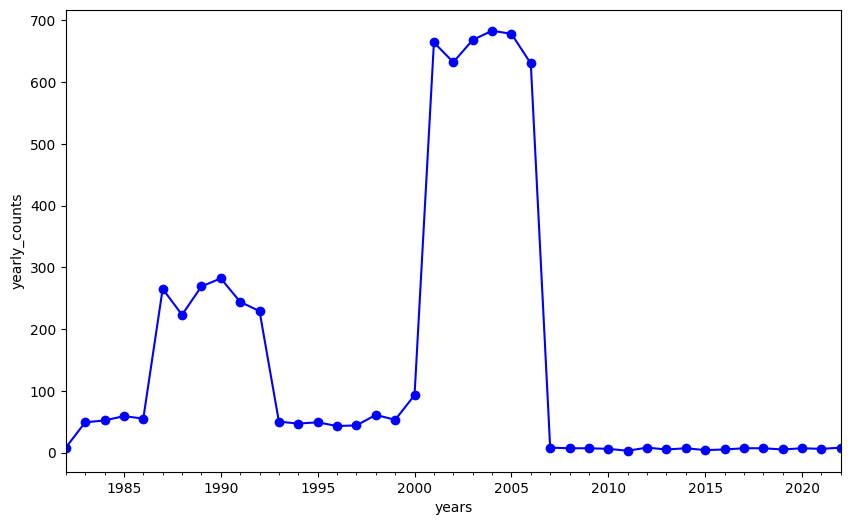

In [ ]:
# Resample by year and count the number of records per year
yearly_counts = df.resample('YE').size()

# Plotting the time series data
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', color='b')
plt.xlabel("years")
plt.ylabel("yearly_counts")

**b**) Using the previous plot, we apply a moving average to smooth out short-term fluctuations in the data. We select a window size that captures variation observed in the previous plot. We compare the original time series with the smoothed version.

In [ ]:
# Apply moving average with a window size of 5 years
smoothed_counts = yearly_counts.rolling(window=5, min_periods=1).mean()  # min_periods=1 allows smoother to start immediately

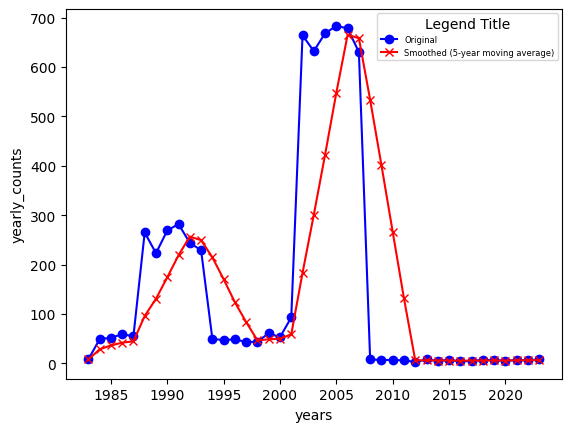

In [ ]:
# Plot original data with label
plt.plot(yearly_counts.index, yearly_counts, marker='o', color='b', label='Original')

# Plot smoothed data with label
plt.plot(smoothed_counts.index, smoothed_counts, marker='x', color='r', label='Smoothed (5-year moving average)')

plt.xlabel("years")
plt.ylabel("yearly_counts")
plt.legend(title="Legend Title", fontsize=6)

**c**) We implement the same graph in a), but resampled by Day, to understand which one gives a better insight into the data.

Text(0, 0.5, 'daily_counts')

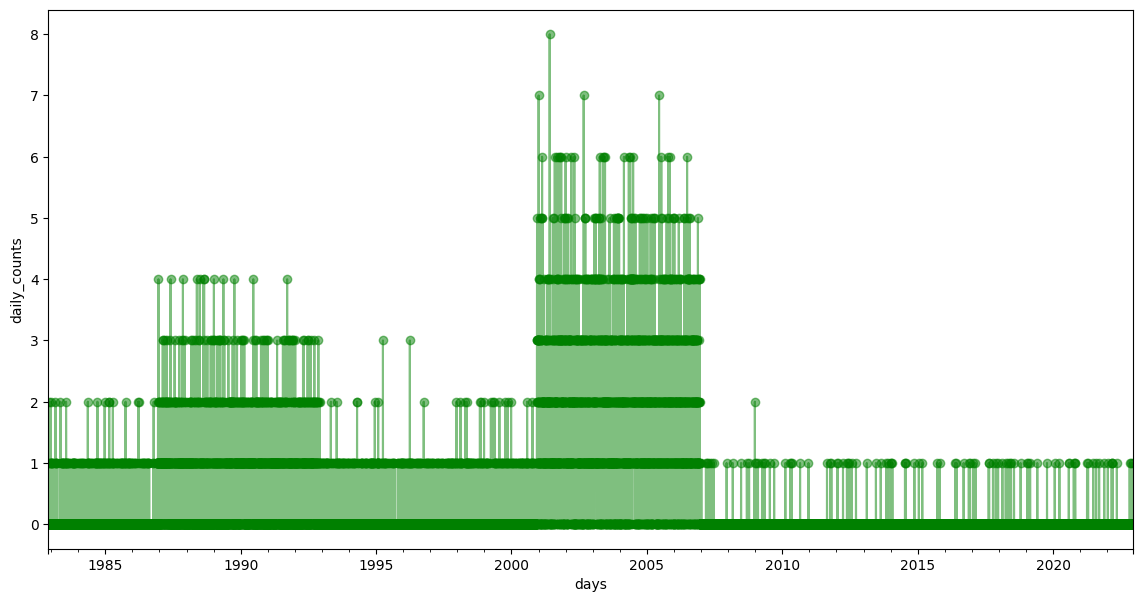

In [ ]:
# Resample by day and count the number of records per day
daily_counts = df.resample('D').size()

# Plotting the daily time series data
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='line', marker='o', color='green', alpha=0.5)  # Use alpha for clarity
plt.xlabel("days")
plt.ylabel("daily_counts")

The analysis compares graphs that aggregate data annually (e.g., showing long-term trends) versus daily (capturing detailed fluctuations). Graphs with annual aggregation are generally better for high-level insights due to clarity and simplicity. Daily counts, while detailed, often lack legibility because they display too many data points, which can obscure broader patterns. However, daily data is useful for investigating specific events or anomalies.

### Part 3

**a**) Given the age groups below, we plot the number of emigration records for each group over annual period to see if there is any difference in patter for the different groups.

In [ ]:
age_groups = [(18, 25), (26, 35), (36, 42), (43, 50), (51, 59)]

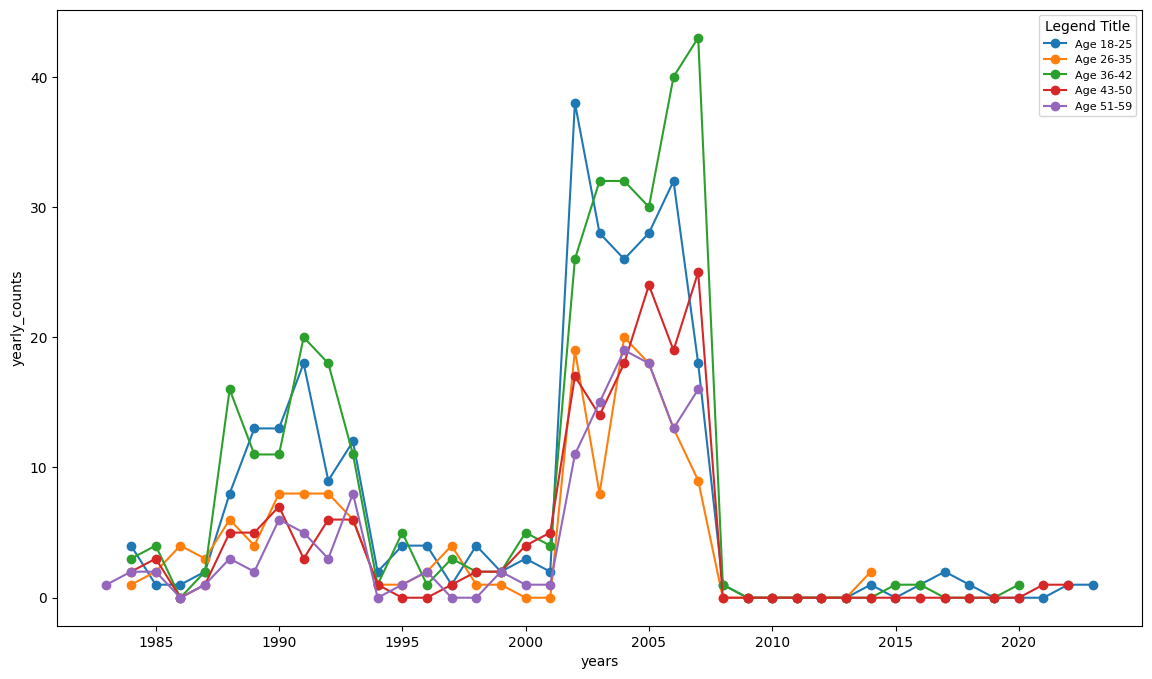

In [ ]:
# Define age groups
age_groups = [(18, 25), (26, 35), (36, 42), (43, 50), (51, 59)]

# Initialize a dictionary to hold counts for each age group
age_group_counts = {}

for lower, upper in age_groups:
    # Filter records for the specific age group
    group = df[df['Age'].between(lower, upper)]

    # Count the number of records per year for this age group
    age_group_counts[f"{lower}-{upper}"] = group.resample('YE').size()

# Plot the data for each age group
plt.figure(figsize=(14, 8))
plt.xlabel("years")
plt.ylabel("yearly_counts")

for group, counts in age_group_counts.items():
    plt.plot(counts.index, counts, marker='o', label=f'Age {group}')
    plt.legend(title="Legend Title", fontsize=8)


##### Distinct patterns emerge across groups, but not all align with expected trends:

##### Age Groups:
#####     - Contrary to expectations, the Elderly (60+) group consistently dominates emigration records, especially between 2001 and 2006, with a sharp peak in 2004 (over 500 records). This group exhibits the most stable and sustained emigration trend over time.
#####     - Younger age groups, such as 18-25 and 26-35, show sporadic records, with noticeable drops or absences in the late 2000s and 2010s.


##### Income Groups:
##### - High Income individuals represent the largest share of emigration consistently over the years, peaking in the early 2000s.
##### - Moderate Income and Low Income groups display significantly lower and more volatile trends, with negligible records in some years.

##### Profession Categories:
##### - Surveillance and Research professionals dominate emigration numbers, particularly in the early 2000s.
##### - Professions like Education and Healthcare remain consistently low, indicating limited mobility among these groups.

##### Distance Categories:
##### - Emigration is more frequent among individuals residing Far (>30 km) from the border, with consistently higher numbers than Moderate (10-30 km) and Near (0-10 km) categories. This counters an intuitive expectation of higher emigration near borders.

##### Civil Status:
##### - Married individuals (based on Civil_Status_Category results) appear more prominently than single or divorced individuals. However, their trends are not explicitly highlighted in the results.

**b**) Based on the summary statistics of the data, we try to create different groups for other attributes in the data. We investigate if there is any emigration patterns for various demographic groups (e.g. income levels, professions, etc).

In [ ]:
print(df['Annual_Income'].describe())
print(df['Profession'].value_counts())
print(df['Age'].value_counts())

count      6230.000000
mean      98418.615891
std        9146.162502
min       20155.000000
25%      100000.000000
50%      100000.000000
75%      100000.000000
max      100000.000000
Name: Annual_Income, dtype: float64
Profession
Government surveillance assistance    2439
Government social researcher          1397
Government cook                        430
Government doctor                      401
Government IT technician               399
Government employee                    392
Government history writer              387
Government teacher                     385
Name: count, dtype: int64
Age
60    5170
48     172
36     167
42     159
30     149
24     145
18     136
54     132
Name: count, dtype: int64


In [ ]:
# Define Income Groups
#------------------------------------------------------------------------------------------------------------
# https://www.geeksforgeeks.org/python-pandas-apply/

# Function to categorize individuals based on income
# The thresholds used here are arbitrary and can be adjusted based on the dataset or real-world standards.
def categorize_income(income):
    if income < 50000:
        return 'Low Income'
    elif 50000 <= income < 100000:
        return 'Moderate Income'
    else:
        return 'High Income'

# Apply the categorization function to the 'Annual_Income' column. This creates a new column 'Income_Group' in the DataFrame.
df['Income_Group'] = df['Annual_Income'].apply(categorize_income)

# Define Profession Categories
profession_categories = {
    'Education': ['Government teacher'],
    'Healthcare': ['Government doctor'],
    'Other': ['Government cook', 'Government IT technician', 'Government employee'],
    'Research': ['Government social researcher', 'Government history writer'],
    'Surveillance': ['Government surveillance assistance'],
}

def categorize_profession(profession):
    for category, professions in profession_categories.items():
        if profession in professions:
            return category
    return 'Other'

df['Profession_Category'] = df['Profession'].apply(categorize_profession)

# Define Age Groups
def categorize_age(age):
    if 18 <= age <= 35:
        return 'Young Adults (18-35)'
    elif 36 <= age <= 50:
        return 'Midlife (36-50)'
    elif 51 <= age <= 59:
        return 'Older Adults (51-59)'
    else:
        return 'Elderly (60+)'

df['Age_Group'] = df['Age'].apply(categorize_age)

In [ ]:
# Aggregate Data:

# Resample by Year for Income Groups
income_counts = df.groupby(['Income_Group']).resample('YE').size().unstack(level=0)

# Resample by Year for Profession Categories
profession_counts = df.groupby(['Profession_Category']).resample('YE').size().unstack(level=0)

# Resample by Year for Age Groups
age_counts = df.groupby(['Age_Group']).resample('YE').size().unstack(level=0)

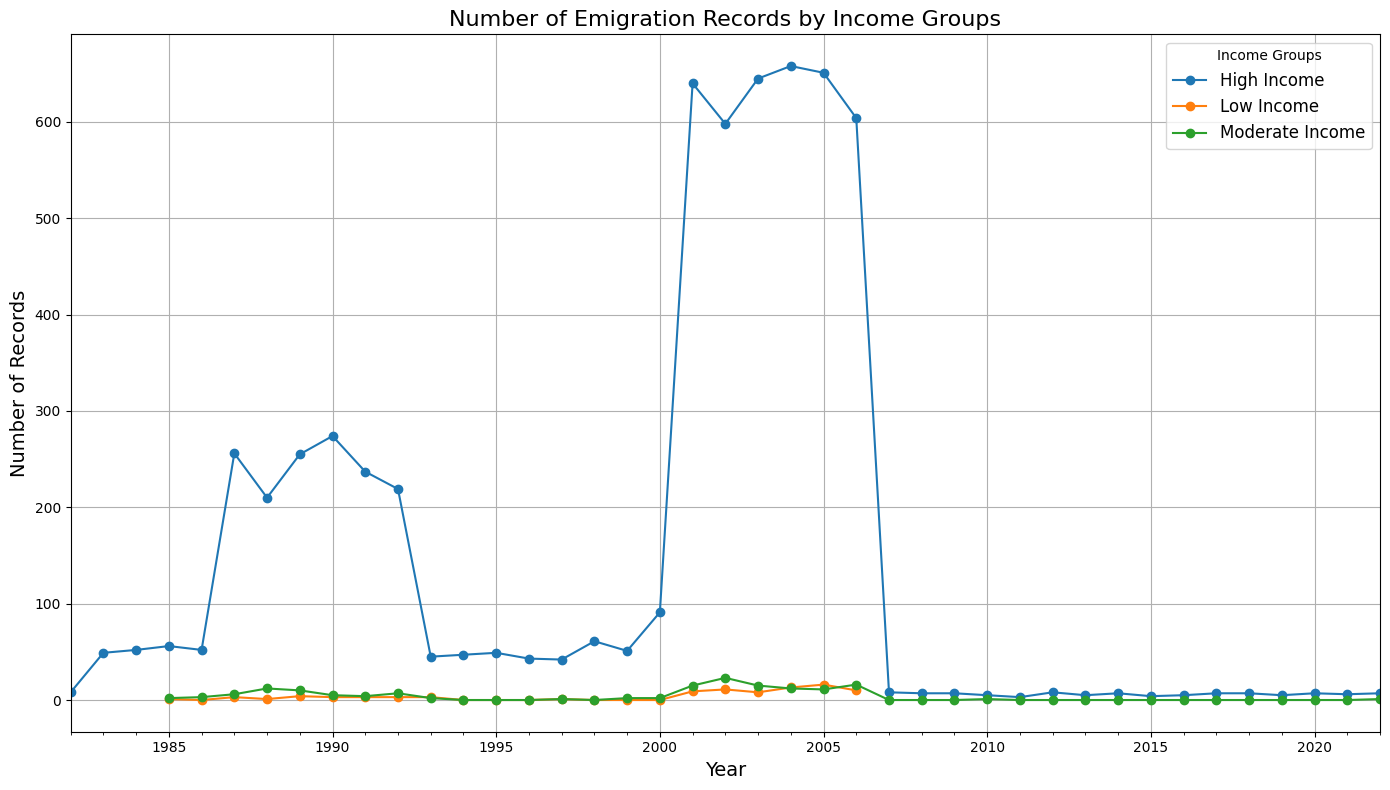

In [ ]:
# Plotting Income Groups
plt.figure(figsize=(14, 8))
income_counts.plot(marker='o', ax=plt.gca())
plt.title('Number of Emigration Records by Income Groups', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.legend(title='Income Groups', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

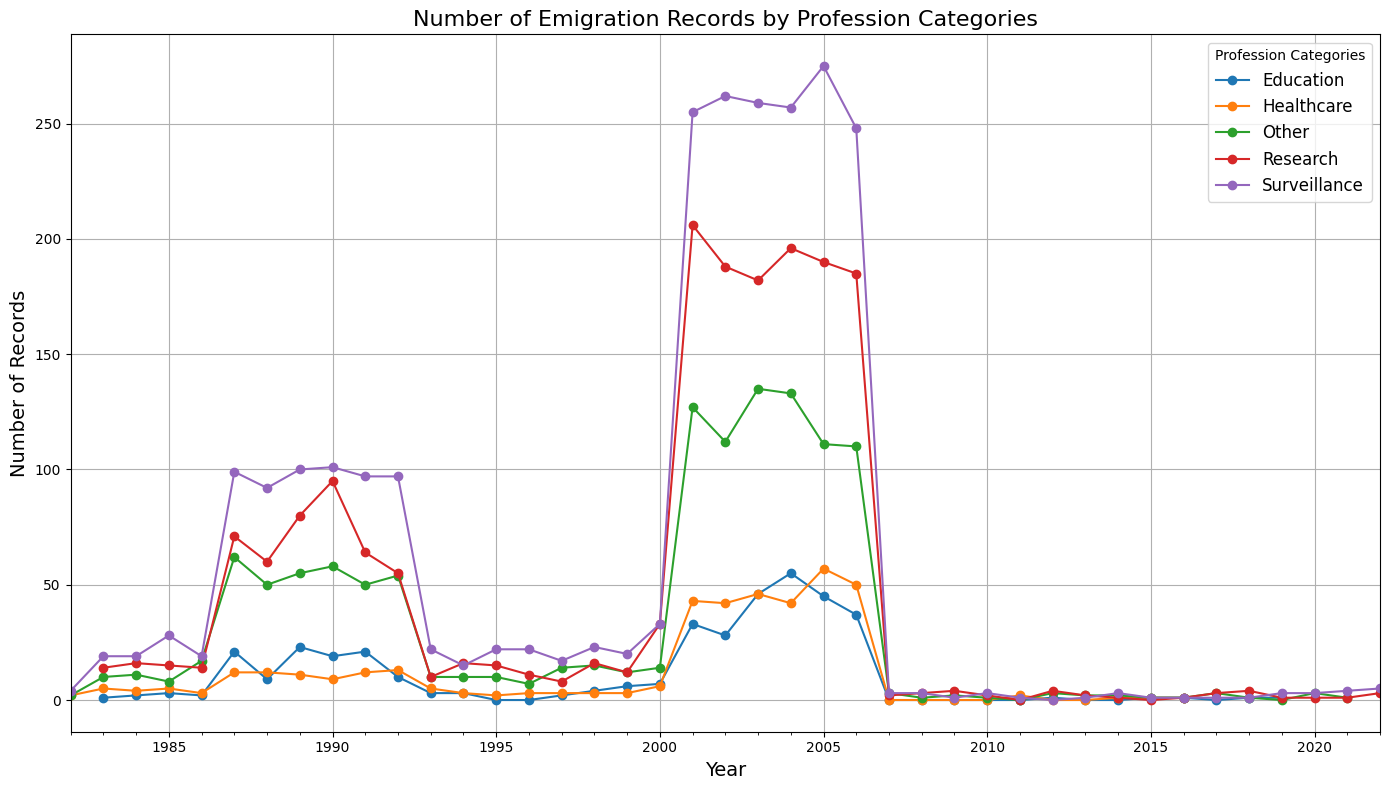

In [ ]:
# Plotting Profession Categories
plt.figure(figsize=(14, 8))
profession_counts.plot(marker='o', ax=plt.gca())
plt.title('Number of Emigration Records by Profession Categories', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.legend(title='Profession Categories', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

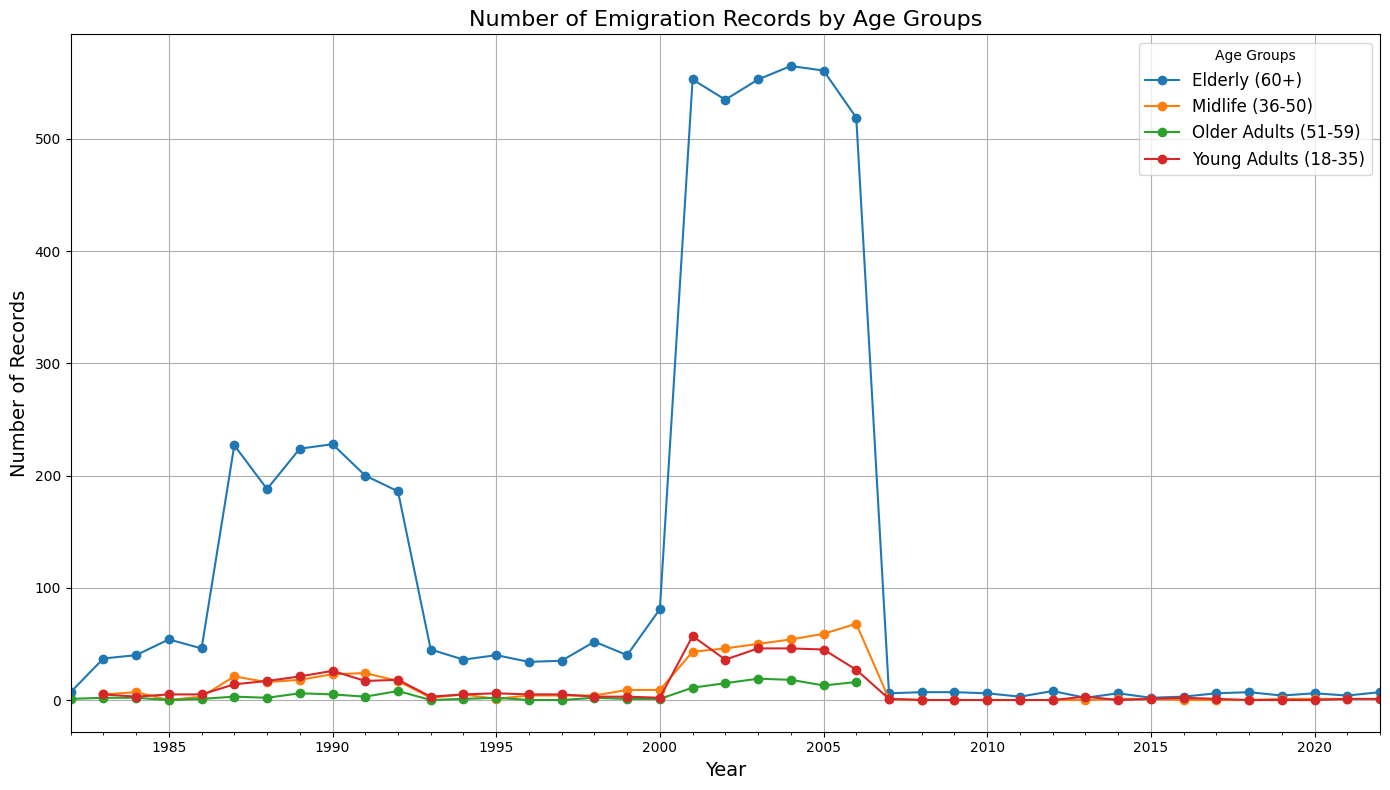

In [ ]:
# Plotting Age Groups
plt.figure(figsize=(14, 8))
age_counts.plot(marker='o', ax=plt.gca())
plt.title('Number of Emigration Records by Age Groups', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.legend(title='Age Groups', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Income Levels: high-income individuals dominate emigration, suggesting that financial resources are a key enabler for emigration.
##### Professions: surveillance and Research are highly represented professions, particularly during periods of increased emigration around 2001-2006. Education and Healthcare professions exhibit much lower emigration numbers.
##### Age Groups: the overwhelming dominance of the Elderly (60+) indicates an unusual pattern, possibly reflecting post-retirement mobility or policies targeting this demographic during the analyzed period.
##### Distance Categories: higher emigration among individuals Far (>30 km) suggests that proximity to the border is not the primary factor, as one might expect the Near (0-10 km) group to dominate.

**c**) We check if the distance to the border impact the number of records over time.

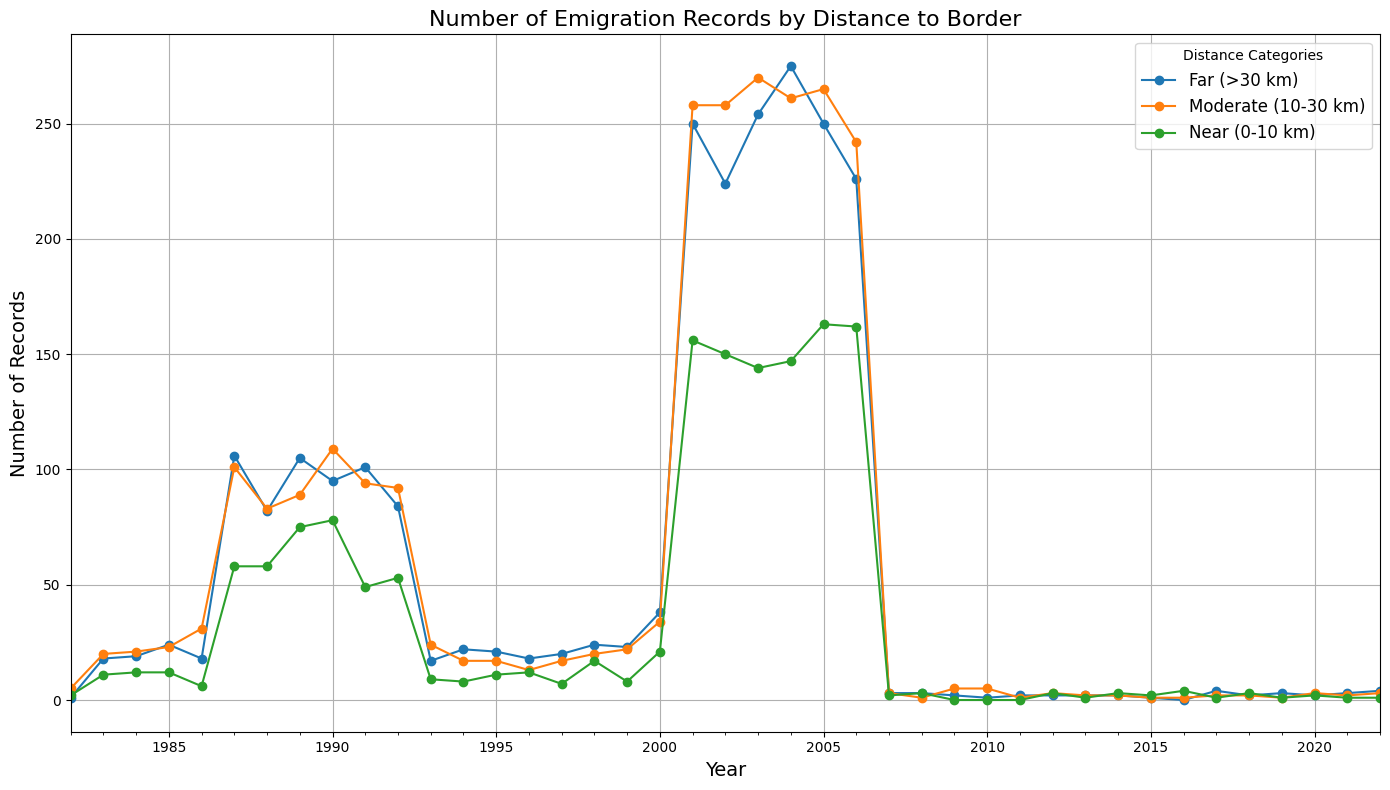

In [ ]:
# Define Distance Categories
def categorize_distance(distance):
    if distance <= 10:
        return 'Near (0-10 km)'
    elif 10 < distance <= 30:
        return 'Moderate (10-30 km)'
    else:
        return 'Far (>30 km)'

df['Distance_Category'] = df['Distance_to_Border'].apply(categorize_distance)

# Group by Distance Category and Resample by Year
distance_counts = df.groupby(['Distance_Category']).resample('YE').size().unstack(level=0)

# Plotting Distance Categories Over Time
plt.figure(figsize=(14, 8))
distance_counts.plot(marker='o', ax=plt.gca())
plt.title('Number of Emigration Records by Distance to Border', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.legend(title='Distance Categories', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### The results show that individuals Far (>30 km) consistently report higher emigration numbers compared to those Near (0-10 km). This trend holds steady over the years, peaking between 2001 and 2006. Surprisingly, proximity to the border does not appear to be a strong driver of emigration. Instead, other factors (e.g., economic opportunities or demographic characteristics) might outweigh geographical proximity.

### Part 4

**a**) Given the record count per year, we identify the 25th quantile and 75th quantile. We can use the [quantile](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) function after resampling and getting the size.

In [ ]:
# Resample by year and calculate the number of records per year
yearly_counts = df.resample('YE').size()

# Calculate the 25th and 75th quantiles
q1 = yearly_counts.quantile(0.25)
q3 = yearly_counts.quantile(0.75)

print(f"25th Quantile (Q1): {q1}")
print(f"75th Quantile (Q3): {q3}")

25th Quantile (Q1): 7.0
75th Quantile (Q3): 229.0


**b**) Given the interquartile range (`75th percentile - 25th percentile`), calculate the lower and upper thresold to identify outliers. Values below `25th percentile - 1.5 * IQR` or above the `75th percentile + 1.5 * IQR` are usually considered outliers. (3 marks)

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = yearly_counts.quantile(0.25)
q3 = yearly_counts.quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Calculate lower and upper thresholds
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

print(f"Interquartile Range (IQR): {iqr}")
print(f"Lower Threshold: {lower_threshold}")
print(f"Upper Threshold: {upper_threshold}")

Interquartile Range (IQR): 222.0
Lower Threshold: -326.0
Upper Threshold: 562.0


**c)** Given the lower and uper bounds in b), we plot the number of records per year with a line chart and overlay the outlier values using a scatter plot.

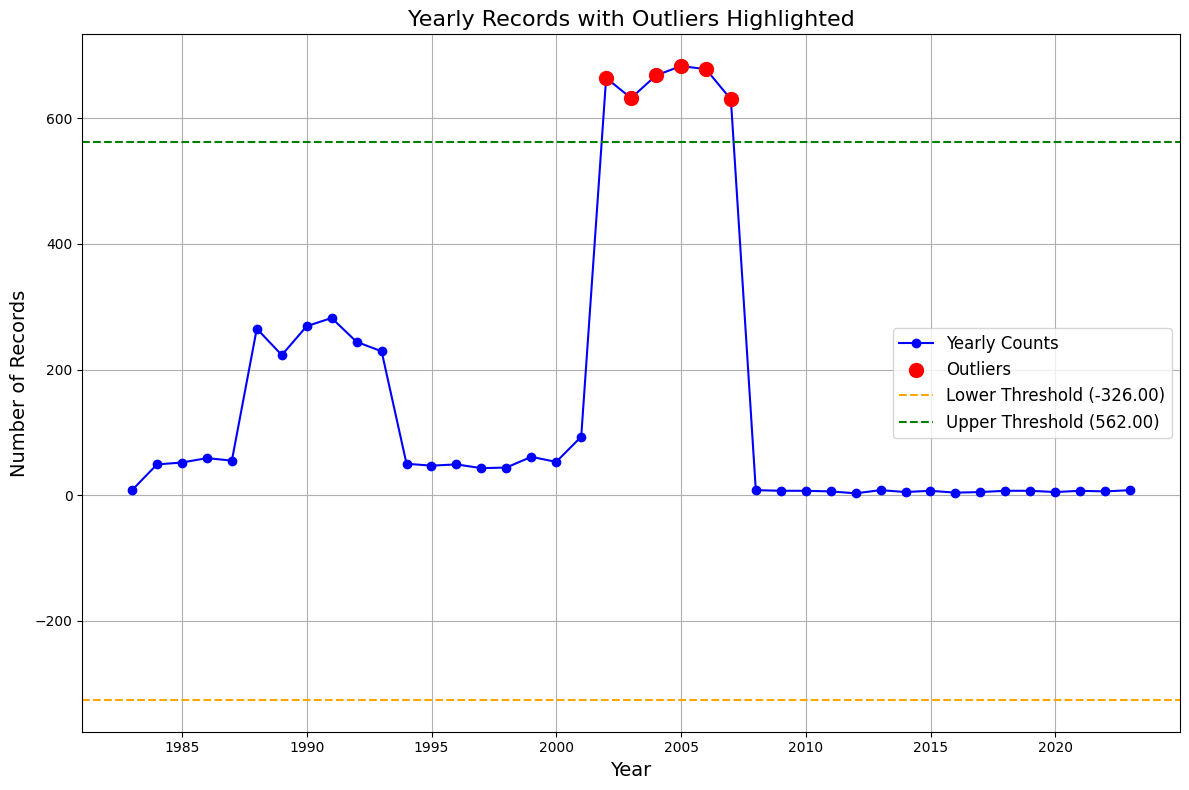

In [ ]:
# Identify outliers
outliers = yearly_counts[(yearly_counts < lower_threshold) | (yearly_counts > upper_threshold)]

# Plotting the data
plt.figure(figsize=(12, 8))

# Line plot for the yearly counts
plt.plot(yearly_counts.index, yearly_counts, marker='o', label='Yearly Counts', color='blue')

# Scatter plot for the outliers
plt.scatter(outliers.index, outliers, color='red', label='Outliers', s=100, zorder=5)

# Customize the plot
plt.title('Yearly Records with Outliers Highlighted', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.axhline(lower_threshold, color='orange', linestyle='--', label=f'Lower Threshold ({lower_threshold:.2f})')
plt.axhline(upper_threshold, color='green', linestyle='--', label=f'Upper Threshold ({upper_threshold:.2f})')
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Part 5

##### Findings:
##### - The dominance of the Elderly (60+) group is unexpected and warrants further investigation into policies or socioeconomic factors influencing this trend.
##### - High Income individuals lead emigration across all years, with peaks in the early 2000s.
##### - Emigration from individuals residing Far (>30 km) outpaces those living Near (0-10 km), contrary to expectations.
##### - Specific professions, like Surveillance and Research, are disproportionately represented, indicating targeted mobility among government-critical roles.
--------------------------------------------------------------------------------------------------------------------------------------------------------

##### Recommendations:

##### - Policy Review for Elderly Emigration: investigate retirement-related policies or benefits driving mobility among the Elderly (60+) group; introduce programs to retain elderly citizens, such as local community support or incentivized domestic relocation.

##### - Regulate High-Income Emigration: address pull factors for high-income individuals by enhancing domestic opportunities for investment or business development.

##### - Reassess Border Proximity Factors: focus on understanding why emigration is higher from distant regions. Improve economic opportunities and infrastructure in border-adjacent areas to balance mobility patterns.

##### - Monitor Key Professions: analyze why Surveillance and Research professionals show higher emigration and develop retention strategies for critical governmental roles.
--------------------------------------------------------------------------------------------------------------------------------------------------------

##### Validity of the Dataset
##### While this analysis offers some useful insights, the reliability of the dataset needs to be questioned because it may contain anomalies.

##### Salary Distribution
##### - Anomalous Cap: The maximum salary is capped at 100,000, and many values are exactly at this cap (mean is 98,418.62). This could indicate a data-entry constraint or policy-driven limit, raising questions about whether higher salaries were truncated.
##### - Skewness: The cap artificially inflates the proportion of high-income individuals, potentially distorting income-based insights.

##### Age Distribution
##### Age values are highly discontinuous, with many repeated entries and an unusually high count for 60 years (5,170 records). This concentration suggests a data-recording issue or an overrepresentation of a specific demographic (e.g., retirees).


##### Geographical Representation:
##### The unusual pattern of higher emigration from regions far from borders contrasts with common migration dynamics. This could indicate:
##### - A selection bias in the dataset.
##### - Incorrect or incomplete recording of location data.

##### Key anomalies in the data (such as a salary cap at 100,000, a disproportionately high number of entries for the age of 60, and a focus solely on government professions) indicate potential data limitations or biases. These issues may compromise the representativeness of the findings and highlight the need for a more comprehensive dataset to draw accurate conclusions about emigration patterns. Future studies should address these limitations to ensure robust and generalizable results.